In [1]:
import odf
%matplotlib inline
import numpy as np
import scipy, matplotlib.pyplot as plt, librosa, IPython.display as ipd
import librosa.display
import math, scipy.signal
import mir_eval

In [2]:
# example of drum 1 (simple)
# filename = 'music/classic_rock_beat.wav'

# example of drum 2 (fast)
# GYARI - 何でも言うことを聞いてくれるアカネチャン
# filename = 'music/akane.wav'

# example of piano
# Stefan Balke's record
# filename = 'music/sir_duke_piano_fast.mp3'

# example of mixed piano music
# Taku Inoue - 夜明けまであと3秒
filename = 'music/yoake.wav'

# example of complicated (barely acceptable)
# The Green Orbs - The Farmer In The Dell
# filename = 'music/example.wav'

# example of complicated (unacceptable)
# GYARI - 何でも言うことを聞いてくれるアカネチャン
# filename = 'music/akane2.wav'

# SAMPLE_RATE = 44100
STFT_WINDOW = 2048
STFT_HOP = 512
# important
AVERAGE_WINDOW = 9

In [3]:
use_file_example = True

if use_file_example:
    print(f'loading file {filename}')
    x, sr = librosa.load(filename, sr=None) # we use the native sample rate
else:
    sr = 22050


    def generate_tone(midi):
        T = 0.5
        t = np.linspace(0, T, int(T * sr), endpoint=False)
        f = librosa.midi_to_hz(midi)
        return np.sin(2 * np.pi * f * t)


    x = np.concatenate([generate_tone(midi) for midi in [48, 52, 55, 60, 64, 67, 72, 76, 79, 84]])

print(f'Sample Rate: {sr}')
print(f'{x.shape}')
print(f'Length of the audio: {float(x.size) / sr} sec')
ipd.Audio(x, rate=sr)

loading file music/yoake.wav
Sample Rate: 48000
(529090,)
Length of the audio: 11.022708333333334 sec


In [4]:
print('Short Time Fourier Transform Info:')
print(f'Window Size: {float(STFT_WINDOW) / sr}')
print(f'Hop Size: {float(STFT_HOP) / sr}')
stft = librosa.stft(x, n_fft=STFT_WINDOW, hop_length=STFT_HOP)

Short Time Fourier Transform Info:
Window Size: 0.042666666666666665
Hop Size: 0.010666666666666666


In [5]:
cdodf_on = odf.complex_domain_odf(stft)
(superflux_onset, filter_bank, tonal_spec) = odf.super_flux_odf(stft,sr,STFT_WINDOW,STFT_HOP,power_spectrum=True)

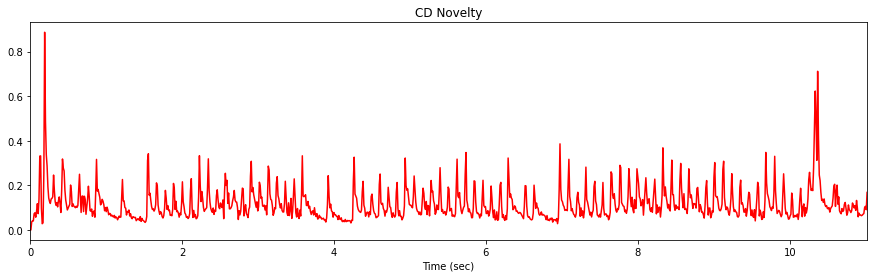

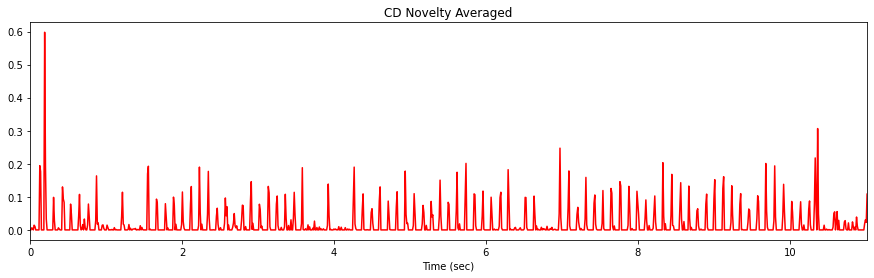

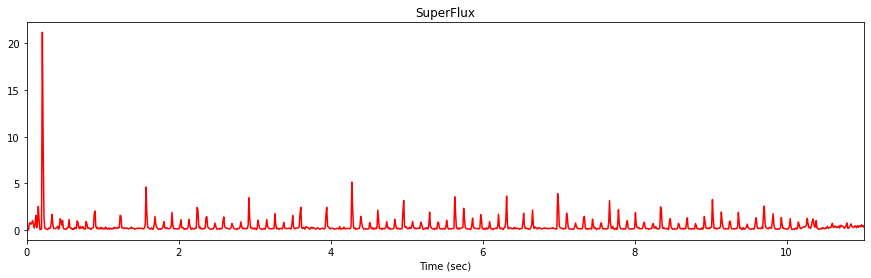

In [8]:
def moving_average(x, n):
    return np.convolve(x, np.ones(n), 'same') / float(n)

frames = np.arange(len(cdodf_on))
od_avg = cdodf_on - moving_average(cdodf_on, AVERAGE_WINDOW)
od_avg = np.maximum(0.0, od_avg)
#
# db_cdodf = librosa.amplitude_to_db(cdodf_on)
# db_avg = db_cdodf - moving_average(db_cdodf, AVERAGE_WINDOW)
# db_avg = np.maximum(0.0, db_avg)

time_axis = librosa.frames_to_time(frames, sr=sr)
plt.figure(figsize=(15, 4))
plt.xlim(0, time_axis.max())
plt.xlabel('Time (sec)')
plt.title('CD Novelty')
plt.plot(time_axis, cdodf_on, 'r-')
plt.show()

plt.figure(figsize=(15, 4))
plt.xlim(0, time_axis.max())
plt.xlabel('Time (sec)')
plt.title('CD Novelty Averaged')
plt.plot(time_axis, od_avg, 'r-')
plt.show()

plt.figure(figsize=(15, 4))
plt.xlim(0, time_axis.max())
plt.xlabel('Time (sec)')
plt.title('SuperFlux')
plt.plot(time_axis, superflux_onset, 'r-')
plt.show()

#
# plt.figure(figsize=(15, 4))
# plt.xlim(0, time_axis.max())
# plt.xlabel('Time (sec)')
# plt.title('CD Novelty')
# plt.plot(time_axis, db_cdodf, 'r-')
# plt.show()
#
# plt.figure(figsize=(15, 4))
# plt.xlim(0, time_axis.max())
# plt.xlabel('Time (sec)')
# plt.title('CD Novelty')
# plt.plot(time_axis, db_avg, 'r-')
# plt.show()

In [7]:
# CD Novelty
peaks = scipy.signal.find_peaks(novelty_function, height=np.average(novelty_function))
onset_times = librosa.frames_to_time(peaks[0], sr=sr)
x_with_clicks = mir_eval.sonify.clicks(onset_times, sr, length=len(x))
ipd.Audio(x + x_with_clicks, rate=sr)

NameError: name 'novelty_function' is not defined

In [ ]:
# Spectral Flux Novelty
peaks = scipy.signal.find_peaks(spectral_novelty, height=np.average(spectral_novelty))
onset_times = librosa.frames_to_time(peaks[0], sr=sr)
x_with_clicks = mir_eval.sonify.clicks(onset_times, sr, length=len(x))
ipd.Audio(x + x_with_clicks, rate=sr)
